# 1. Problema del sub-arreglo máximo
**Entrada**: Arreglo de números $[a_1,a_n]$

**Salida**: Sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.

El problema del sub-arreglo máximo es cuando buscamos un conjunto de elementos contiguos dentro de un arreglo tal que dicho conjunto sea mayor a cualquier otro sub-arreglo posible en el arreglo.

Este tiene varias aplicaciones reales. Por ejemplo, podemos ocupar este sub-arreglo máximo en una lista de ingresos de una compañía X para observar en que partes del año reciben más ingresos.


# 2. Sub-Arreglo Máximo

El siguiente código muestra una implementación divide y vencerás del algoritmo para encontrar el **Sub-Arreglo Máximo**.

## 2.1. Código

In [89]:
import random as rd
from termcolor import colored
import math as mt
import matplotlib.pyplot as plt
import copy
import datetime
from timeit import repeat

In [129]:
def maxSubMid(A, low, mid, high, cont, verbose=False):
    if verbose:
        print("------------ INICIO FUNCION NO RECURSIVA ------------")
        print("Arreglo actual: ", colored(f"{str(A[low:high+1])}","green"), "\n")
    suma = 0
    izq = der = -mt.inf
    cont += 1
    for i in range(mid, low-1, -1):
        suma += A[i]
        cont += 1
        if suma > izq:
            izq = suma
            indIzq = i
            if verbose: print("Nueva suma izquierda: ", colored(f"{str(suma)}","red"), "\nNuevo índice izquierdo: ", colored(f"{str(indIzq)}","red"), "\n")
    
    suma = 0
    for i in range(mid, high + 1):
        suma += A[i]
        cont += 1
        if suma > der:
            der = suma
            indDer = i
            if verbose: print("Nueva suma derecha: ", colored(f"{str(suma)}","blue"), "\nNuevo índice derecho: ", colored(f"{str(indDer)}","blue"), "\n")
    
    if verbose: print("------------ FIN FUNCION NO RECURSIVA ------------")
    return max(izq + der - A[mid], izq, der), indIzq, indDer, cont

In [108]:
def maxSubArray(A, low, high, cont = 0, verbose=False):
    if low > high: 
        if verbose: print("high menor a low, arreglo inválido, retornando -inf como suma...")
        return -mt.inf, low, high, cont
    if low == high: 
        if verbose: print("low == high, arreglo de un elemento, retornando A[low] como suma...")
        return A[low], low, high, cont
    mid = (low + high) // 2
    if verbose:
        print("Funcion Recursiva:")
        print("Arreglo Recibido:", colored(f"{str(A[low:high+1])}","yellow"))
        print("Arreglo Dividido:",colored(f"{str(A[low:mid+1])}","red"),",",colored(f"{str(A[mid+1:high+1])}","blue"), "\n")
    sumIzq, indIzqIzq, indIzqDer, cont = maxSubArray(A, low, mid - 1, cont, verbose)
    sumDer, indDerIzq, indDerDer, cont = maxSubArray(A, mid + 1, high, cont, verbose)
    sumMid, indMidIzq, indMidDer, cont = maxSubMid(A, low, mid, high, cont, verbose)
    maxSub = max(sumIzq, sumDer, sumMid)
    if verbose:
        print("Arreglo Izquierdo: ", colored(f"{str(A[indIzqIzq:indIzqDer+1])}","red"))
        print("Suma Arreglo Izquierdo: ", colored(f"{str(sumIzq)}","red"), "\n")
        print("Arreglo Medio: ", colored(f"{str(A[indMidIzq:indMidDer+1])}","green"))
        print("Suma Arreglo Medio: ", colored(f"{str(sumMid)}","green"), "\n")
        print("Arreglo Derecho: ", colored(f"{str(A[indDerIzq:indDerDer+1])}","blue"))
        print("Suma Arreglo Derecho: ", colored(f"{str(sumDer)}","blue"), "\n")
    if maxSub == sumIzq: 
        if verbose: print("Subarreglo Máximo es el izquierdo, retornándolo...\n")
        return maxSub, indIzqIzq, indIzqDer, cont
    elif maxSub == sumDer: 
        if verbose: print("Subarreglo Máximo es el derecho, retornándolo...\n")
        return maxSub, indDerIzq, indDerDer, cont
    elif maxSub == sumMid: 
        if verbose: print("Subarreglo Máximo es el que pasa por el medio, retornándolo...\n")
        return maxSub, indMidIzq, indMidDer, cont


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $a$ de $n$ elementos, e indices para el inicio y final del arreglo. Luego, comenzamos a buscar el sub-arreglo máximo de la siguiente manera:

1. Se guarda el índice de la mitad del arreglo $\frac{n}{2}$.

2. Se llama recursivamente la función de nuevo para ir dividiendo el arreglo en sub arreglos, los cuales cada uno comparará su arreglo izquierdo, medio (Que pasa por el punto medio del arreglo) y derecho, y retornará el mayor de ellos.

3. Para obtener el sub-arreglo máximo que pasa por el punto medio, se llama una función separada no recursiva la cual hace dos sumatorias para el lado izquierdo y derecho del arreglo, y retorna el mayor entre la sumatoria izquierda, derecha o la suma de ambas menos el valor del medio.

4. Al terminar la recursión, se retorna la suma del sub-arreglo máximo.

## 2.3. Ejemplo

Por ejemplo, tenemos un arreglo:

$a=[1,2,4,-1,6,-5]$

Comenzamos subdividiendo el arreglo por la mitad

$a_1=[1,2,4]$, $b_1=[-1,6,-5]$

Lo repetimos en el lado izquierdo hasta terminar con arreglos de un elemento, sin el valor de mid:

$a_2=[1, 2]$, $b_2=[4]$

$a_3=[1]$, $a_4=[2]$

Aquí sucederán tres cosas, El lado izquierdo $a_3$ al hacer recursión recibirá un high menor a low, al cual retornaremos -inf como la suma para evitar errores, el lado derecho $a_4$ recibirá un high igual a low, al cual retornaremos $a[low]$, y finalmente, comenzaremos la función no recursiva para conseguir el sub-arreglo máximo que pase por el punto medio del sub-arreglo $a_2$ (explicada posteriormente).

Después de todo esto, la función escoge la mayor suma entre las sumas del lado izquierdo, lado derecho y el sub-arreglo medio, y la retorna junto a sus índices.

Esto se repetirá para el lado derecho del arreglo $b_1$, 

Para explicar la función de sub-arreglo máximo que pase por el punto medio, mejor ocuparé el arreglo completo $a$ para más claridad:

$a=[1,2,4,-1,6,-5]$

Comenzamos la función con un bucle que comienza a sumar desde mid a low, este va sobrescribiendo una variable de suma y una de índice si es que la suma obtenida en el índice actual es mayor a la previa.

$a_1=[1,2,4]$

$4 > -\infty, suma = 4, índice = 2$

$4+2=6 > 4, suma = 6, índice = 1$

$10+1=11 > 6, suma = 11, índice = 0$

Se repite para el lado derecho:

$a_2=[-2, 6, -5]$

$-2 > -\infty, suma = -2, índice = 3$

$-2+6=4 > -2, suma = 4, índice = 4$

$4-5=11 < 4, suma = 4, índice = 4$



## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre dentro de ambas funciones:

In [92]:
a = rd.sample(range(-100, 100), 5)
suma, i, j, cont = maxSubArray(a, 0, len(a) - 1, 0, True)
print("Subarreglo máximo: " , a[i:j+1])
print("Suma de sub-arreglo maximo: ", suma)

Funcion Recursiva:
Arreglo Recibido: [32, -33, 20, 34, -81]
Arreglo Dividido: [32, -33, 20] , [34, -81] 

Funcion Recursiva:
Arreglo Recibido: [32, -33]
Arreglo Dividido: [32] , [-33] 

high menor a low, arreglo inválido, retornando -inf como suma...
low == high, arreglo de un elemento, retornando A[low] como suma...
------------ INICIO FUNCION NO RECURSIVA ------------
Arreglo actual:  [32, -33] 

Nueva suma izquierda:  32 
Nuevo índice izquierdo:  0 

Nueva suma derecha:  32 
Nuevo índice derecho:  0 

------------ FIN FUNCION NO RECURSIVA ------------
Arreglo Izquierdo:  []
Suma Arreglo Izquierdo:  -inf 

Arreglo Medio:  [32]
Suma Arreglo Medio:  32 

Arreglo Derecho:  [-33]
Suma Arreglo Derecho:  -33 

Subarreglo Máximo es el que pasa por el medio, retornándolo...

Funcion Recursiva:
Arreglo Recibido: [34, -81]
Arreglo Dividido: [34] , [-81] 

high menor a low, arreglo inválido, retornando -inf como suma...
low == high, arreglo de un elemento, retornando A[low] como suma...
-------

Los textos colorizados de rojo corresponden al lado izquierdo del arreglo, los azules al lado derecho y los verdes al arreglo que cruza el medio del arreglo.

Al finalizar el programa, recibimos los índices en los que se encuentra el sub-arreglo máximo y la suma de este.

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*Nuestro algoritmo para encontrar el **Subarreglo Máximo** tiene un **tiempo de ejecución de** $O(n log (n))$ en **todos** los casos.*

### **Árbol de recurrencia**

Para calcular el tiempo de ejecución de nuestro algoritmo, debemos recordar que este se basa en la metodología divide y vencerás, entonces debemos tener en cuenta 2 cosas:
1. En cada iteración el problema se va a dividir en dos (n\2)
2. La suma de cada nivel es igual a n.

Ahora tenemos que tomar en cuenta que $T(n)=O(nlog(n))$, siendo esto lo que nos quedaría si multiplicamos la altura con la cantidad de datos.

Podemos apreciar que esto es muy similar al MergeSort, esto se debe a que ambos hacen básicamente lo mismo: dividen el arreglo en 2 cada iteración y utilizan una función separada para propósitos de su algoritmo respectivo.
 
En la siguiente imagen se muestra el árbol de recurrencia $T(n) = 2T(\frac{n}{2})+cn$:



![image](https://cdn.kastatic.org/ka-perseus-images/5fcbebf66560d8fc490de2a0d8a0e5b1d65c5c54.png)

En la imagen podemos observar como el árbol se expande progresivamente. Posee $log_2n$ niveles y cada nivel tiene un costo $cn$. Con esto podemos decir que el total sería $cn log_2$, lo cual intrepretamos como $O(n log (n))$

# 4. Correctitud

### **Teorema (Correctitud)**

*El algoritmo para encontrar el **sub-arreglo máximo** recibe un arreglo de tamaño $n$ ($[a_1,a_2,....a_n]$) y retorna un arreglo de tamaño $m$ que contiene la suma contigua máxima $[a_1',a_2',...a_m']$ dentro del arreglo original, donde $\sum\limits_{i = 1}^{n}ai \leq \sum\limits{i = 1}^{m}a_i'$.

## Prueba del Teorema

Previamente observamos que en cada llamada de `maxSubArray` subdividimos el arreglo por la mitad hasta conseguir un array de largo 1, y después la función `maxSubMid` nos busca los sub-arreglos que pasen por el medio del arreglo.

Por lo tanto, probaremos la correctitud de la función `maxSubArray` utilizando inducción matemática, y la correctitud de la función `Merge` con la propiedad del bucle invariante.

# Prueba del teorema (maxSubMid)

La función maxSubMid recibe un arreglo y la posición media de este (mid)

Lo que hace esta función es buscar dentro del arreglo entregado, un sub-arreglo que contenga la suma más alta y que pase por el punto medio del arreglo en sí.

Para probar su correctitud con la propiedad del bucle invariante, primero debemos analizar la inicialización de los bucles ($i = mid - 1$ y $i = mid$), y comprobar si se mantiene durante la ejecución de este.

> Al comienzo de cada iteración $i$ será la variable que irá aumentando en nuestros bucles, siendo $i$ el índice previo a la posición media del arreglo en el primer bucle y la posición media del arreglo en el segundo bucle. Al finalizar cada bucle nuestro arreglo resultante debe ser el que contenga la mayor suma de datos.

**Inicialización**

Al comienzo de la primera iteración ($i = mid-1$ y $j = mid$), los arreglos serán de un solo elemento, entonces trivialmente tendrán la suma máxima de elementos.

**Mantención**

Al comienzo de cada iteración $i$ los arreglos resultantes de los bucles serán aquellos que tengan la suma máxima de elementos.

Durante el bucle la función se asegurará de que el dato siguiente aumenta la suma total, si la aumenta, se agregará al arreglo resultante, y si no, avanza a la siguiente iteración y lo agrega si la suma aumenta en esa iteración.

Al finalizar la iteración, nuestro arreglo resultante será el que posea la mayor suma hasta el momento, entonces podemos decir que se seguirá cumpliendo la **propiedad invariante**.

# Prueba del teorema (maxSubArray)

Como destacamos previamente, utilizaremos inducción matemática para probar la correctitud de la función maxSubArray. Para probar una declaración $P(n)$ en inducción matemática, para todos los números naturales $n$ debemos seguir los siguientes pasos:

1.   Probar $P(n)$ con un caso base, en nuestro caso $P(1)$.
2.   Probar si $P(m)$ es cierto para $m < n$, de tal forma que para $P(n)$ esto también esté correcto.

Recordamos que la función recibe un arreglo de $n$ números $[a_1,a_2,....,a_n]$ y retornará un sub-arreglo de $m$ números donde $m \leq n$ < $[a_1',a_2',....,a_n']$, donde $\sum\limits_{i = 0}^{n}a_i \leq\sum\limits_{i=0}^{m}a_i'$

En nuestro caso base $P(1)$, como maxSubArray recibirá un arreglo de largo 1, la función lo considera como la mayor suma, entonces se cumple $P(1)$.

Para el segundo caso, recordamos que MergeSort recibe un arreglo de largo $n$ y lo subdivide en sub-arreglos de tamaño $m = \frac{n}{2}$ hasta llegar a $n$ arreglos de largo 1 como en el caso base, al cual ya le comprobamos su correctitud previamente.




# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* Cantidad de comparaciones caso promedio calculadas matemáticamente 
* Cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre -100 y 100.

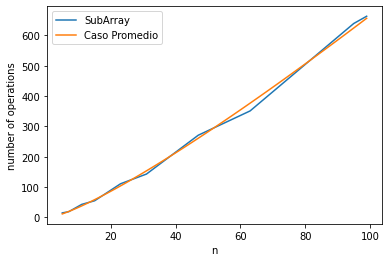

In [133]:
x=[n for n in range(5,100)] 
y1=[n * mt.log2(n) for n in range(5,100)] # caso promedio
y=[]; 

for n in range(5,100):
  a = rd.sample(range(-100, 100), n)
  suma, i, j, cont = maxSubArray(a, 0, len(a) - 1)
  y.append(cont)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["SubArray", "Caso Promedio"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

### Análisis de resultados

Como habiamos discutido en una seccion previa, los casos de ejecucion del subArray no varian, entonces ambos su mejor y peor caso son $O(n log(n))$.

En el gráfico se puede apreciar que, aunque está ligeramente separado de la linea, el tiempo de ejecucion del subArray se mantiene cerca de $n(log(n))$.

Esta separación parece ser un problema con mi contador en la función, no estoy seguro de como arreglarla tristemente.

## 5.2. Tiempo de ejecución (experimental)

En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **Divide y vencerás** previamente escrito para este problema, en función del tamaño del problema para arreglos generados aleatoriamente de tamaños $n \in [5,500]$, y se compara al mismo tiempo del algoritmo de **Kadane**.

# Codigo Kadane


In [ ]:
def kadane(a, size):
       
    max_so_far = -mt.inf
    max_ending_here = cont = 0
       
    for i in range(0, size):
        max_ending_here += a[i]
        if (max_so_far < max_ending_here):
            cont += 1
            max_so_far = max_ending_here
  
        if max_ending_here < 0:
            max_ending_here = 0 

    return max_so_far, cont

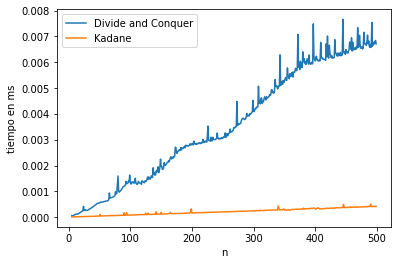

In [132]:
x=[]; y=[]

for n in range(5,500):

  a = rd.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a}, 0, len({a}) - 1, 0)", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)

x=[]; y=[]

for n in range(5,500):

  a = rd.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a}, len({a}))", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["Divide and Conquer", "Kadane"])

plt.xlabel('n')
plt.ylabel('tiempo en ms')
plt.show()

### Análisis de resultados

En el gráfico podemos inmediatamente darnos cuenta de que el algoritmo de Kadane es mucho mas eficaz que nuestro algoritmo divide y vencerás, esto es debido a que el algoritmo de Kadane posee una complejidad temporal de $O(n)$ a diferencia del $O(nlog(n))$ que posee el divide y vencerás.

Note que hay unos peaks de tiempo. Estos se deben probablemente al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando.